In [0]:
#Power forecast on a customer(smartmeter) using lstm

In [0]:
#importing libraries
import numpy as np 
import pandas as pd 
from pyspark.pandas import read_csv
import matplotlib.pyplot as plt 


In [0]:
#dataset converting to DF and finding the shape
dataset = pd.read_csv('/dbfs/FileStore/tables/smartmeters_dataset.csv',index_col='timestamp')
df=dataset
print(df.shape)
print(df)


(2160, 100)
 cons_0 cons_1 cons_2 ... cons_97 cons_98 cons_99
timestamp ... 
2018-01-01 00:00:00 0.290 0.077 0.206 ... 0.057 0.280 0.549
2018-01-01 01:00:00 0.350 0.059 0.248 ... 0.063 0.412 0.581
2018-01-01 02:00:00 0.229 0.400 0.136 ... 0.122 0.357 0.489
2018-01-01 03:00:00 0.207 0.100 0.124 ... 0.080 0.130 0.346
2018-01-01 04:00:00 0.186 0.064 0.084 ... 0.050 0.130 0.360
... ... ... ... ... ... ... ...
2018-03-31 19:00:00 0.291 0.092 0.211 ... 0.361 0.359 0.434
2018-03-31 20:00:00 0.341 0.106 0.185 ... 0.240 0.262 0.341
2018-03-31 21:00:00 0.271 0.081 0.139 ... 0.310 0.317 0.755
2018-03-31 22:00:00 0.266 0.354 0.097 ... 0.201 0.348 1.363
2018-03-31 23:00:00 0.232 0.119 0.074 ... 0.059 0.338 0.144

[2160 rows x 100 columns]

In [0]:
#selecting first 7 customers
import matplotlib.pyplot as plt
#print(df)
print(df.shape)
print(type(df.index[0]))
df.index = pd.to_datetime(df.index)
print(df.index)
print(df)
df=df[['cons_0','cons_1','cons_2','cons_3','cons_4','cons_5','cons_6']]
print(df)

(2160, 100)
<class 'str'>
DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
 '2018-01-01 02:00:00', '2018-01-01 03:00:00',
 '2018-01-01 04:00:00', '2018-01-01 05:00:00',
 '2018-01-01 06:00:00', '2018-01-01 07:00:00',
 '2018-01-01 08:00:00', '2018-01-01 09:00:00',
 ...
 '2018-03-31 14:00:00', '2018-03-31 15:00:00',
 '2018-03-31 16:00:00', '2018-03-31 17:00:00',
 '2018-03-31 18:00:00', '2018-03-31 19:00:00',
 '2018-03-31 20:00:00', '2018-03-31 21:00:00',
 '2018-03-31 22:00:00', '2018-03-31 23:00:00'],
 dtype='datetime64[ns]', name='timestamp', length=2160, freq=None)
 cons_0 cons_1 cons_2 ... cons_97 cons_98 cons_99
timestamp ... 
2018-01-01 00:00:00 0.290 0.077 0.206 ... 0.057 0.280 0.549
2018-01-01 01:00:00 0.350 0.059 0.248 ... 0.063 0.412 0.581
2018-01-01 02:00:00 0.229 0.400 0.136 ... 0.122 0.357 0.489
2018-01-01 03:00:00 0.207 0.100 0.124 ... 0.080 0.130 0.346
2018-01-01 04:00:00 0.186 0.064 0.084 ... 0.050 0.130 0.360
... ... ... ... ... ... ... ...
2018-03-31 19:00:00 0.291 0.092 0.211 ... 0.361 0.359 0.434
2018-03-31 20:00:00 0.341 0.106 0.185 ... 0.240 0.262 0.341
2018-03-31 21:00:00 0.271 0.081 0.139 ... 0.310 0.317 0.755
2018-03-31 22:00:00 0.266 0.354 0.097 ... 0.201 0.348 1.363
2018-03-31 23:00:00 0.232 0.119 0.074 ... 0.059 0.338 0.144

[2160 rows x 100 columns]
 cons_0 cons_1 cons_2 cons_3 cons_4 cons_5 cons_6
timestamp 
2018-01-01 00:00:00 0.290 0.077 0.206 0.160 0.353 0.263 0.104
2018-01-01 01:00:00 0.350 0.059 0.248 0.284 0.710 0.363 0.143
2018-01-01 02:00:00 0.229 0.400 0.136 0.283 0.329 0.339 0.203
2018-01-01 03:00:00 0.207 0.100 0.124 0.391 0.283 0.357 0.081
2018-01-01 04:00:00 0.186 0.064 0.084 0.394 0.169 0.300 0.151
... ... ... ... ... ... ... ...
2018-03-31 19:00:00 0.291 0.092 0.211 0.158 0.151 0.069 0.218
2018-03-31 20:00:00 0.341 0.106 0.185 0.201 0.196 0.321 0.430
2018-03-31 21:00:00 0.271 0.081 0.139 0.811 0.309 0.437 0.306
2018-03-31 22:00:00 0.266 0.354 0.097 1.026 0.436 0.426 0.125
2018-03-31 23:00:00 0.232 0.119 0.074 0.482 0.262 0.381 0.228

[2160 rows x 7 columns]

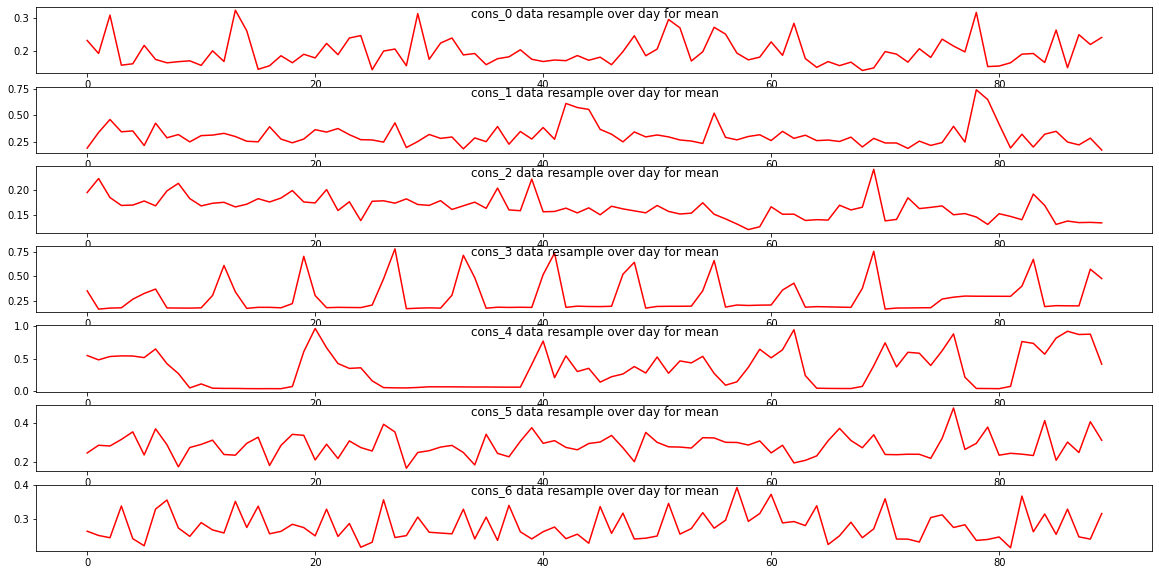

In [0]:
#data resample over day for mean
import matplotlib.pyplot as plt

i = 1
cols=[0,1,2,3,4,5,6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('D').mean().values[:, col],color="red")
    plt.title(df.columns[col] + ' data resample over day for mean', y=0.75, loc='center',color="black")
    i += 1
plt.show()
         


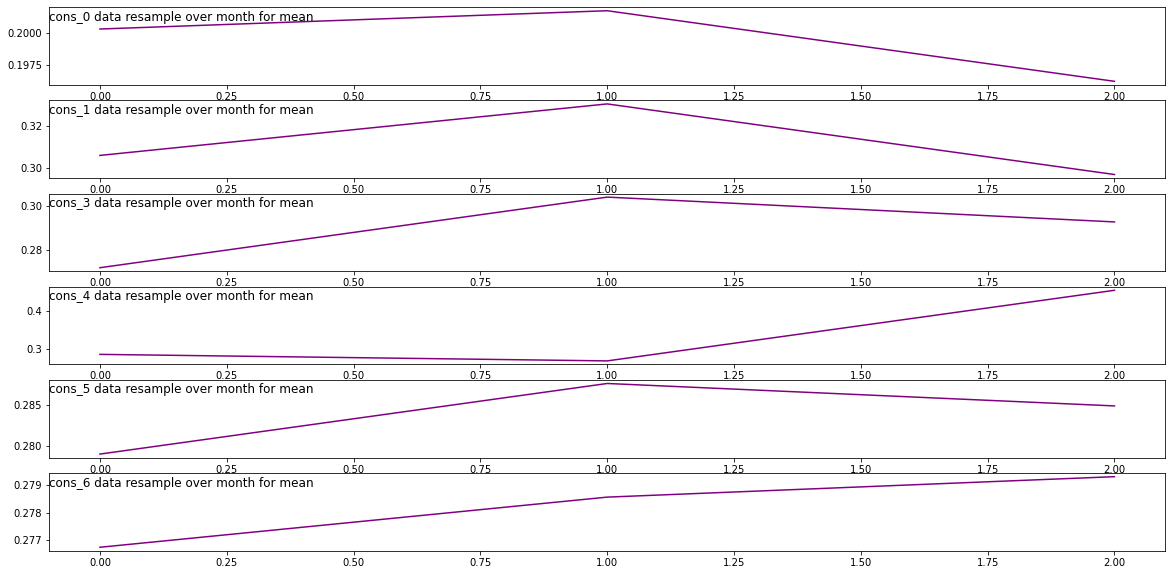

In [0]:
#data resample over month for mean
import matplotlib.pyplot as plt

i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('M').mean().values[:, col],color="purple")
    plt.title(df.columns[col] + ' data resample over month for mean', y=0.75, loc='left')
    i += 1
plt.show()

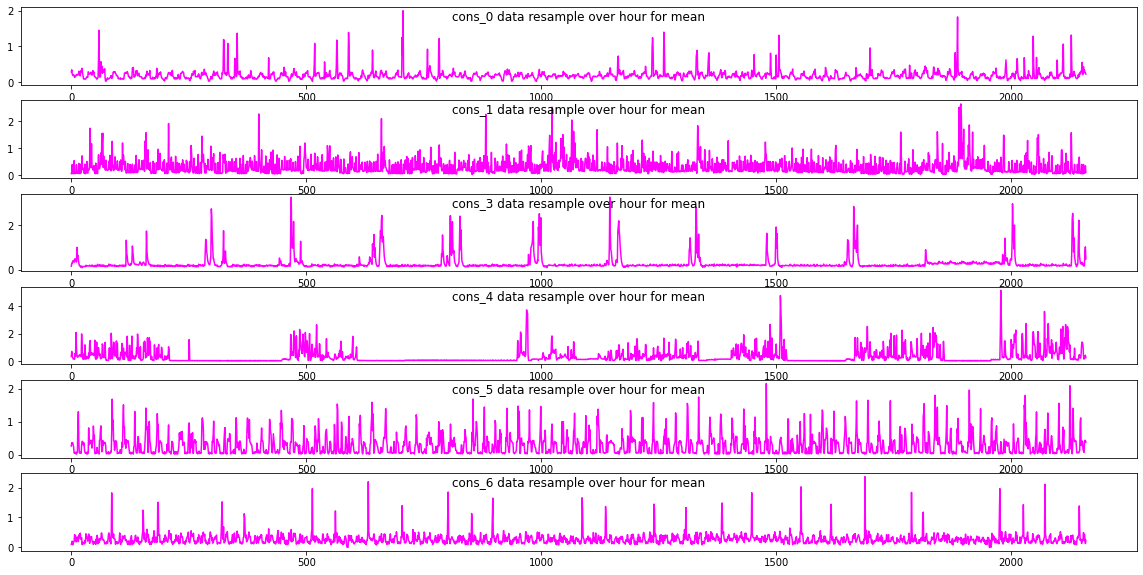

In [0]:
# data resample over hour for mean
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('H').mean().values[:, col],color="magenta")
    plt.title(df.columns[col] + ' data resample over hour for mean', y=0.75, loc='center')
    i += 1
plt.show()

In [0]:
#correlation between costumer id
#df1=[['cons_0','cons_1','cons_2','cons_3','cons_4','cons_5','cons_6']]
df.corr()

Out[7]:

,cons_0,cons_1,cons_2,cons_3,cons_4,cons_5,cons_6
cons_0,1.000000,0.060666,0.200694,0.104129,0.081555,0.161918,0.046926
cons_1,0.060666,1.000000,0.115063,-0.013501,0.037245,0.148255,-0.003470
cons_2,0.200694,0.115063,1.000000,0.147058,0.078268,0.135735,0.171674
cons_3,0.104129,-0.013501,0.147058,1.000000,0.018673,0.032977,0.033379
cons_4,0.081555,0.037245,0.078268,0.018673,1.000000,0.059243,0.037690
cons_5,0.161918,0.148255,0.135735,0.032977,0.059243,1.000000,-0.029764
cons_6,0.046926,-0.003470,0.171674,0.033379,0.037690,-0.029764,1.000000


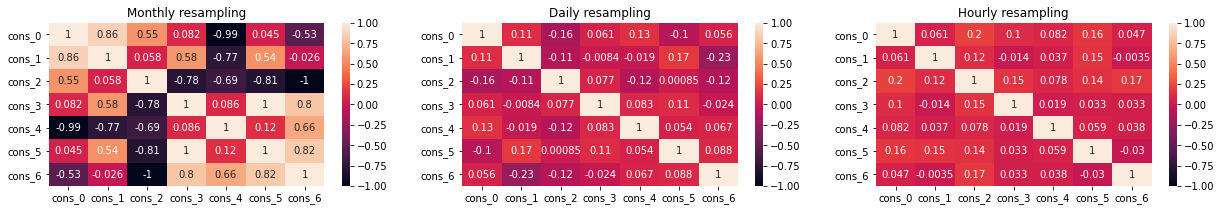

In [0]:
#correlation between monthly, daily, hourly resampling
import seaborn as sns
f= plt.figure(figsize=(21,3))

ax=f.add_subplot(131)
dfm = df.resample('M').mean()
sns.heatmap(dfm.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Monthly resampling', size=12)

ax=f.add_subplot(132)
dfd = df.resample('D').mean()
sns.heatmap(dfd.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Daily resampling', size=12)
  
ax=f.add_subplot(133)
dfh = df.resample('H').mean()
sns.heatmap(dfh.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Hourly resampling', size=12)
plt.show()

In [0]:
df = df[['cons_0','cons_1','cons_2','cons_3','cons_4','cons_5','cons_6']]
print(df.shape)

(2160, 7)

In [0]:
#LSTM USAGE

In [0]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    print(data)
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In [0]:
df.shape

Out[12]: (2160, 7)

In [0]:
from sklearn.preprocessing import MinMaxScaler

values = df.values
#print(values)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
#print(scaled)
reframed = series_to_supervised(scaled, 1, 1)
#print(reframed)
r = list(range(df.shape[1]+1, 2*df.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
#print(reframed.head())

# Data spliting into train and test data series. 1600 first data points are selected for trainig purpose.
values = reframed.values
print(reframed.values)
n_train_time = 1600
train = values[:n_train_time, :]
#print(train)
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
#print(train_x)
test_x, test_y = test[:, :-1], test[:, -1]
#print(test_y)
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
#print(train_x.shape[0],train_x.shape[1])
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
#print(test_x.shape[0],test_x.shape[1])

[[0.13282443 0.01688411 0.11481261 ... 0.06380896 0.11479235 0.04390038]
 [0.16335878 0.00997698 0.13979774 ... 0.13368565 0.1614559 0.06036302]
 [0.10178117 0.14082886 0.07317073 ... 0.05911137 0.15025665 0.08569016]
 ...
 [0.12315522 0.01841903 0.07495538 ... 0.05519671 0.19598693 0.12916843]
 [0.12061069 0.12317728 0.04997026 ... 0.08005481 0.19085394 0.05276488]
 [0.10330789 0.03300077 0.03628792 ... 0.04599726 0.16985534 0.09624314]]
[[0.16335878 0.00997698 0.13979774 ... 0.1614559 0.06036302 0.13282443]
 [0.10178117 0.14082886 0.07317073 ... 0.15025665 0.08569016 0.16335878]
 [0.09058524 0.0257099 0.06603212 ... 0.15865609 0.03419164 0.10178117]
 ...
 [0.12315522 0.01841903 0.07495538 ... 0.19598693 0.12916843 0.15877863]
 [0.12061069 0.12317728 0.04997026 ... 0.19085394 0.05276488 0.12315522]
 [0.10330789 0.03300077 0.03628792 ... 0.16985534 0.09624314 0.12061069]]

In [0]:
"""(1) 100 neurons in the first visible layer

(2) dropout 10%

(3) 1 neuron in the output layer for predicting power consumption

(4) The input shape will be 1 time step with 7 features

(5) The mean_squared_error loss function and the efficient adam version of stochastic gradient descent

(6) The model will be fit for 50 training epochs with a batch size of 70."""

Out[14]: '(1) 100 neurons in the first visible layer\n\n(2) dropout 10%\n\n(3) 1 neuron in the output layer for predicting power consumption\n\n(4) The input shape will be 1 time step with 7 features\n\n(5) The mean_squared_error loss function and the efficient adam version of stochastic gradient descent\n\n(6) The model will be fit for 50 training epochs with a batch size of 70.'

Model: "sequential"
_________________________________________________________________
 Layer (type) Output Shape Param # 
=================================================================
 lstm (LSTM) (None, 100) 43200 
 
 dropout (Dropout) (None, 100) 0 
 
 dense (Dense) (None, 1) 101 
 
=================================================================
Total params: 43,301
Trainable params: 43,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
23/23 - 3s - loss: 0.0071 - val_loss: 0.0058 - 3s/epoch - 129ms/step
Epoch 2/100
23/23 - 0s - loss: 0.0053 - val_loss: 0.0052 - 125ms/epoch - 5ms/step
Epoch 3/100
23/23 - 0s - loss: 0.0049 - val_loss: 0.0051 - 114ms/epoch - 5ms/step
Epoch 4/100
23/23 - 0s - loss: 0.0048 - val_loss: 0.0050 - 113ms/epoch - 5ms/step
Epoch 5/100
23/23 - 0s - loss: 0.0046 - val_loss: 0.0049 - 113ms/epoch - 5ms/step
Epoch 6/100
23/23 - 0s - loss: 0.0045 - val_loss: 0.0049 - 124ms/epoch - 5ms/step
Epoch 7/100
23/23 - 0s - loss: 0.0045 - val_loss: 0.0049 - 102ms/epoch - 4ms/step
Epoch 8/100
23/23 - 0s - loss: 0.0045 - val_loss: 0.0049 - 104ms/epoch - 5ms/step
Epoch 9/100
23/23 - 0s - loss: 0.0044 - val_loss: 0.0049 - 125ms/epoch - 5ms/step
Epoch 10/100
23/23 - 0s - loss: 0.0044 - val_loss: 0.0049 - 119ms/epoch - 5ms/step
Epoch 11/100
23/23 - 0s - loss: 0.0044 - val_loss: 0.0049 - 114ms/epoch - 5ms/step
Epoch 12/100
23/23 - 0s - loss: 0.0044 - val_loss: 0.0049 - 124ms/epoch - 5ms/step
Epoch 13/100
23/23 - 0s - loss: 0.0043 - val_loss: 0.0049 - 125ms/epoch - 5ms/step
Epoch 14/100
23/23 - 0s - loss: 0.0044 - val_loss: 0.0049 - 104ms/epoch - 5ms/step
Epoch 15/100
23/23 - 0s - loss: 0.0044 - val_loss: 0.0049 - 107ms/epoch - 5ms/step
Epoch 16/100
23/23 - 0s - loss: 0.0044 - val_loss: 0.0049 - 129ms/epoch - 6ms/step
Epoch 17/100
23/23 - 0s - loss: 0.0044 - val_loss: 0.0049 - 126ms/epoch - 5ms/step
Epoch 18/100
23/23 - 0s - loss: 0.0044 - val_loss: 0.0049 - 114ms/epoch - 5ms/step
Epoch 19/100
23/23 - 0s - loss: 0.0043 - val_loss: 0.0049 - 113ms/epoch - 5ms/step
Epoch 20/100
23/23 - 0s - loss: 0.0043 - val_loss: 0.0049 - 125ms/epoch - 5ms/step
Epoch 21/100
23/23 - 0s - loss: 0.0043 - val_loss: 0.0049 - 105ms/epoch - 5ms/step
Epoch 22/100
23/23 - 0s - loss: 0.0044 - val_loss: 0.0049 - 106ms/epoch - 5ms/step
Epoch 23/100
23/23 - 0s - loss: 0.0043 - val_loss: 0.0049 - 126ms/epoch - 5ms/step
Epoch 24/100
23/23 - 0s - loss: 0.0044 - val_loss: 0.0049 - 132ms/epoch - 6ms/step
Epoch 25/100
23/23 - 0s - loss: 0.0044 - val_loss: 0.0049 - 123ms/epoch - 5ms/step
Epoch 26/100
23/23 - 0s - loss: 0.0043 - val_loss: 0.0049 - 127ms/epoch - 6ms/step
Epoch 27/100
23/23 - 0s - loss: 0.0043 - val_loss: 0.0049 - 131ms/epoch - 6ms/step
Epoch 28/100
23/23 - 0s - loss: 0.0043 - val_loss: 0.0049 - 109ms/epoch - 5ms/step
Epoch 29/100
23/23 - 0s - loss: 0.0043 - val_loss: 0.0049 - 104ms/epoch - 5ms/step
Epoch 30/100
23/23 - 0s - loss: 0.0043 - val_loss: 0.0049 - 131ms/epoch - 6ms/step
Epoch 31/100
23/23 - 0s - loss: 0.0043 - val_loss: 0.0049 - 127ms/epoch - 6ms/step
Epoch 32/100
23/23 - 0s - loss: 0.0043 - val_loss: 0.0049 - 124ms/epoch - 5ms/step
Epoch 33/100
23/23 - 0s - loss: 0.0043 - val_loss: 0.0049 - 116ms/epoch - 5ms/step
Epoch 34/100
23/23 - 0s - loss: 0.0043 - val_loss: 0.0049 - 135ms/epoch - 6ms/step
Epoch 35/100
23/23 - 0s - loss: 0.0043 - val_loss: 0.0049 - 114ms/epoch - 5ms/step
Epoch 36/100
23/23 - 0s - loss: 0.0043 - val_loss: 0.0049 - 107ms/epoch - 5ms/step
Epoch 37/100
23/23 - 0s - loss: 0.0043 - val_loss: 0.0049 - 131ms/epoch - 6ms/step
Epoch 38/100
23/23 - 0s - loss: 0.0043 - val_loss: 0.0049 - 108ms/epoch - 5ms/step
Epoch 39/100
23/23 - 0s - loss: 0.0043 - val_loss: 0.0049 - 118ms/epoch - 5ms/step
Epoch 40/100
23/23 - 0s - loss: 0.0043 - val_loss: 0.0049 - 116ms/epoch - 5ms/step
Epoch 41/100
23/23 - 0s - loss: 0.0043 - val_loss: 0.0049 - 114ms/epoch - 5ms/step
Epoch 42/100
23/23 - 0s - loss: 0.0043 - val_loss: 0.0049 - 107ms/epoch - 5ms/step
Epoch 43/100
23/23 - 0s - l

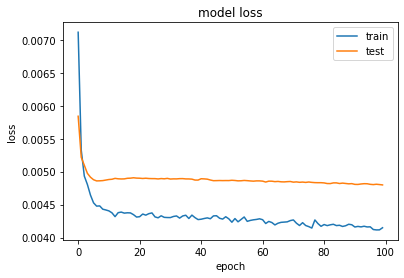

7
Test RMSE LSTM: 0.136

In [0]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
#print(train_x.shape[1])
model.add(Dropout(0.1))
model.add(Dense(1))
print(model.summary())
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(train_x, train_y, epochs=100, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

size = df.shape[1]
print(size)

# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
#pred=inv_y

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE LSTM: %.3f' % rmse)

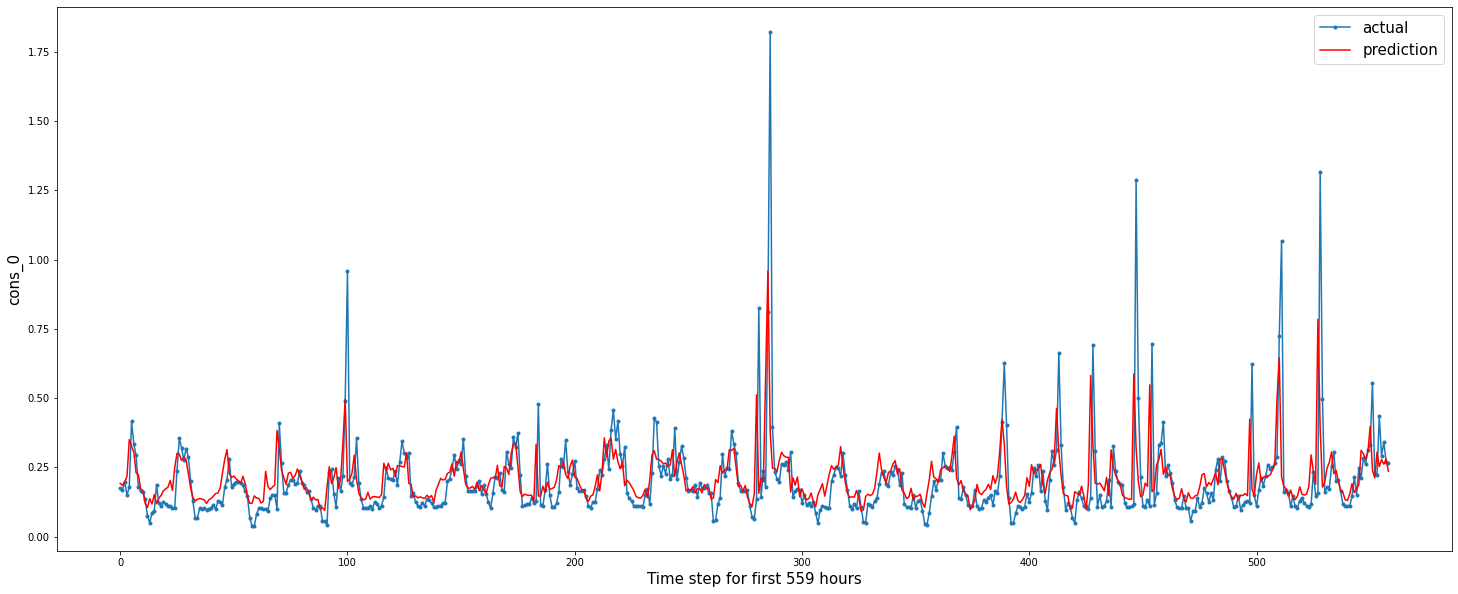

In [0]:
aa=[x for x in range(559)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[:559], marker='.', label="actual")
plt.plot(aa, inv_yhat[:559], 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for first 559 hours', size=15)
plt.legend(fontsize=15)
plt.show()

In [0]:
for i in range(0,559):
    print("predicted power for test dataset ",i,"hours",inv_yhat[i])

predicted power for test dataset 0 hours 0.19223442887514827
predicted power for test dataset 1 hours 0.18547370133548974
predicted power for test dataset 2 hours 0.198054218493402
predicted power for test dataset 3 hours 0.2177500388175249
predicted power for test dataset 4 hours 0.3503672085851431
predicted power for test dataset 5 hours 0.3255479102730751
predicted power for test dataset 6 hours 0.30554966339468953
predicted power for test dataset 7 hours 0.23033710023015735
predicted power for test dataset 8 hours 0.2230696980431676
predicted power for test dataset 9 hours 0.17292206966876983
predicted power for test dataset 10 hours 0.16636175443977116
predicted power for test dataset 11 hours 0.11911203771457077
predicted power for test dataset 12 hours 0.10500447654724121
predicted power for test dataset 13 hours 0.13684281745553015
predicted power for test dataset 14 hours 0.11767471734061838
predicted power for test dataset 15 hours 0.15202264817059039
predicted power for test dataset 16 hours 0.11882958797365427
predicted power for test dataset 17 hours 0.1387027327120304
predicted power for test dataset 18 hours 0.14862686806917189
predicted power for test dataset 19 hours 0.16526125089824198
predicted power for test dataset 20 hours 0.17274692667275665
predicted power for test dataset 21 hours 0.1778141269981861
predicted power for test dataset 22 hours 0.2030019093081355
predicted power for test dataset 23 hours 0.16715356533974407
predicted power for test dataset 24 hours 0.2491802934706211
predicted power for test dataset 25 hours 0.30094441132247446
predicted power for test dataset 26 hours 0.29809035496413705
predicted power for test dataset 27 hours 0.2747044973224401
predicted power for test dataset 28 hours 0.28724410922825333
predicted power for test dataset 29 hours 0.27583573104441167
predicted power for test dataset 30 hours 0.22734518995136022
predicted power for test dataset 31 hours 0.17462602084130047
predicted power for test dataset 32 hours 0.14071338543295858
predicted power for test dataset 33 hours 0.12918198404461145
predicted power for test dataset 34 hours 0.13472164442390203
predicted power for test dataset 35 hours 0.13755537991970776
predicted power for test dataset 36 hours 0.1353077578321099
predicted power for test dataset 37 hours 0.13292058353871106
predicted power for test dataset 38 hours 0.11958043505996466
predicted power for test dataset 39 hours 0.13275849245116114
predicted power for test dataset 40 hours 0.13780158737301826
predicted power for test dataset 41 hours 0.1459833844527602
predicted power for test dataset 42 hours 0.1555579219162464
predicted power for test dataset 43 hours 0.157448450230062
predicted power for test dataset 44 hours 0.17554378302395343
predicted power for test dataset 45 hours 0.22951373928785324
predicted power for test dataset 46 hours 0.2788797318339348
predicted power for test dataset 47 hours 0.3141520349830389
predicted power for test dataset 48 hours 0.2282877236753702
predicted power for test dataset 49 hours 0.21387848993390798
predicted power for test dataset 50 hours 0.21854507060348988
predicted power for test dataset 51 hours 0.20834800907969472
predicted power for test dataset 52 hours 0.20206599304080008
predicted power for test dataset 53 hours 0.19204670978337526
predicted power for test dataset 54 hours 0.2178338257744908
predicted power for test dataset 55 hours 0.19233675056695937
predicted power for test dataset 56 hours 0.14552013320475815
predicted power for test dataset 57 hours 0.11996894711256027
predicted power for test dataset 58 hours 0.12041230938956142
predicted power for test dataset 59 hours 0.14723597237467764
predicted power for test dataset 60 hours 0.13899767802655696
predicted power for test dataset 61 hours 0.13816087720543144
predicted power for test dataset 62 hours 0.12135275685787202
predicted power for test dataset 63 hours 0.12716335963085293
predicted power for test dataset 64 hours 0.23554155422002077


Out[18]:

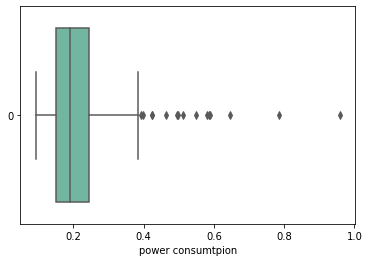

Text(0.5, 0, 'power consumtpion')

In [0]:
#Load libraries
import seaborn as sns
from scipy import stats

#df=[inv_yhat]
ax = sns.boxplot(data=inv_yhat, orient="h", palette="Set2")
ax.set_xlabel('power consumtpion')

In [0]:
#threshold / cut off procedure to find low consumption
l=[]
a=inv_yhat
predicted_power=list(a)
print(type(predicted_power))
#for i in predicted_power:
    #print(i)
predicted_power=sorted(predicted_power)
#print(predicted_power)
l1=[]
for i in predicted_power:
    if i<0.1:
        l1.append(i)
print("less power consumed list",l1)
    


<class 'list'>
less power consumed list [0.09231706989556551, 0.09483400197327137, 0.0959129841402173, 0.096800755482167, 0.09752742396295071, 0.09779232719540597, 0.09845876510813832]

In [0]:
#box plot and histogram
import pandas as pd
#df = pd.DataFrame(predicted_power)
# creating the DataFrame
df = pd.DataFrame(list(zip(predicted_power))) 
df.columns =['predicted_power']
# displaying the DataFrame
print(df)
print(df.describe())
import plotly.express as px
print("histogram")
fig = px.histogram(df,x='predicted_power')
print("box plot")
fig = px.box(df, y='predicted_power')

fig.show()
fig.show()

predicted_power
0 0.092317
1 0.094834
2 0.095913
3 0.096801
4 0.097527
.. ...
554 0.585035
555 0.587569
556 0.645552
557 0.784776
558 0.959232

[559 rows x 1 columns]
 predicted_power
count 559.000000
mean 0.208146
std 0.084639
min 0.092317
25% 0.150094
50% 0.188721
75% 0.244165
max 0.959232
histogram
box plot

Out[21]:

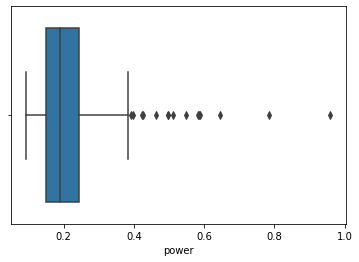

Text(0.5, 0, 'power')

In [0]:
ax = sns.boxplot(x=df["predicted_power"])
ax.set_xlabel('power')

probable outliers
[552, 553, 554, 555, 556, 557, 558]
possible outliers
[544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558]

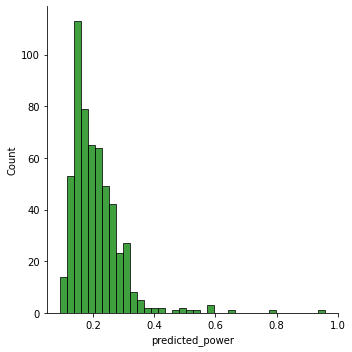

In [0]:
#Tukey’s box plot method
#Tukey's method
sns.displot(df['predicted_power'],color='green')
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss
        
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "predicted_power")
print("probable outliers")
print(probable_outliers_tm)
print("possible outliers")
print(possible_outliers_tm)


probable outliers [553, 554, 555, 556, 557, 558]
possible outliers [546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558]

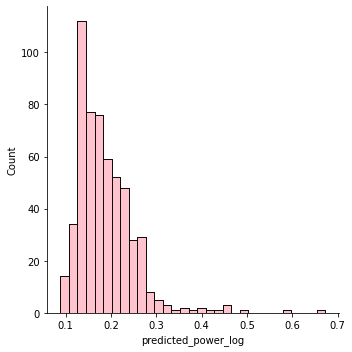

In [0]:
#Transform 'predicted_power' to log 
#If a distribution is highly skewed (usually found in real-life data), the Tukey method can be extended to the log-IQ method
log_CRIM = np.log(df['predicted_power'])
df['predicted_power_man'] = df['predicted_power']+1
log_predicted_power = np.log(df['predicted_power_man'])
df['predicted_power_log'] = log_predicted_power

#Plot
sns.displot(df['predicted_power_log'],color='pink')
sns.histplot(df['predicted_power_log'],color='pink')

#Calculate probable and possible outliers using log-iq method
probable_outliers_logiq, possible_outliers_logiq = tukeys_method(df, 'predicted_power_log')
print("probable outliers",probable_outliers_logiq)
print("possible outliers",possible_outliers_logiq)

In [0]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers
outliers = find_outliers_IQR(df['predicted_power'])


print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

print(outliers)

number of outliers: 15
max outlier value: 0.9592324576675892
min outlier value: 0.39170227327942847
544 0.391702
545 0.398324
546 0.422572
547 0.424423
548 0.462942
549 0.495682
550 0.497517
551 0.511646
552 0.547907
553 0.581501
554 0.585035
555 0.587569
556 0.645552
557 0.784776
558 0.959232
Name: predicted_power, dtype: float64

In [0]:
#Internally studentized residuals AKA z-score method
#Internally studentized method (z-score)
def z_score_method(df, variable_name):
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    z = np.abs(stats.zscore(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index = item
    for i, v in enumerate(z[:, index]):
        if v > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

outlier_z = z_score_method(df, 'predicted_power')
print(outlier_z)
# [380, 398, 404, 405, 410, 414, 418, 427]

[548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558]

In [0]:
#Median Absolute Deviation method
#MAD method
def mad_method(df, variable_name):
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    med = np.median(df, axis = 0)
    mad = np.abs(stats.median_abs_deviation(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index == item
    for i, v in enumerate(df.loc[:,variable_name]):
        t = (v-med[index])/mad[index]
        if t > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

outlier_mad = mad_method(df, 'predicted_power')
print(outlier_mad)

[524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558]